*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


## Cosine Similarity

### load part2 embeddings

In [1]:
import pickle

with open('word2vec_embeddings.pkl', 'rb') as f:
    data = pickle.load(f)

embeddings = data['embeddings']
word2idx = data['word2idx']
idx2word = data['idx2word']

### Tokenize

In [2]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download("punkt_tab")

def tokenize_text(text):
    return word_tokenize(text.lower())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### functions

In [3]:
def cosine_sim(u, v, eps=1e-12):
    u = np.asarray(u)
    v = np.asarray(v)
    return float(u @ v / (np.linalg.norm(u)*np.linalg.norm(v) + eps))


In [4]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

In [5]:
# PyTorch embeddings function
def sent_vec_pytorch(text, embeddings, word2idx):
    toks = tokenize_text(text)
    vecs = []
    for w in toks:
        if w in word2idx:
            vecs.append(embeddings[word2idx[w]])
    if len(vecs) == 0:
        return np.zeros(embeddings.shape[1])
    return np.mean(np.stack(vecs, axis=0), axis=0)


In [6]:
#genism function
def sent_vec_gensim(text, kv):
    toks = tokenize_text(text)
    vecs = [kv[w] for w in toks if w in kv]
    if len(vecs) == 0:
        return np.zeros(kv.vector_size)
    return np.mean(np.stack(vecs, axis=0), axis=0)

### PyTorch Skip-Gram

In [7]:
#word2vec_embeddings
try:
    import torch
    if isinstance(embeddings, torch.Tensor):
        E = embeddings.detach().cpu().numpy()
    else:
        E = np.asarray(embeddings)
except:
    E = np.asarray(embeddings)

E = np.asarray(E, dtype=np.float32)

print("E shape:", E.shape)
print("vocab size:", len(word2idx))
print("Query sentence:")
print(query)

print("=" * 50)

qv = sent_vec_pytorch(query, E, word2idx)

scores = []
for s in sentences:
    sv = sent_vec_pytorch(s, E, word2idx)
    scores.append((s, cosine_sim(qv, sv)))

for s, sc in sorted(scores, key=lambda x: x[1], reverse=True):
    print(f"{sc:.3f} | {s}")

E shape: (18497, 100)
vocab size: 18497
Query sentence:
My pet cat is sleeping on the carpet.
0.394 | My shopping list includes milk and bread.
0.386 | The cat sat on the mat.
0.345 | A dog is playing in the yard.
0.303 | The weather is beautiful today.
0.302 | I need to buy groceries today.
0.226 | Canines enjoy outdoor activities.
0.199 | The feline was resting on the rug.
0.070 | Programming requires logical thinking.


### Gensim Word2Vec                

In [8]:
from gensim.models import Word2Vec
gensim_text8_w2v = Word2Vec.load("word2vec_text8_gensim.model")
kv_text8 = gensim_text8_w2v.wv


In [9]:
print("==== Gensim Word2Vec (Text8, 100d) ====")

print("Query sentence:")
print(query)

print("=" * 50)

qv = sent_vec_gensim(query, kv_text8)
scores = []
for s in sentences:
    sv = sent_vec_gensim(s, kv_text8)
    scores.append((s, cosine_sim(qv, sv)))

for s, sc in sorted(scores, key=lambda x: x[1], reverse=True):
    print(f"{sc:.3f} | {s}")

==== Gensim Word2Vec (Text8, 100d) ====
Query sentence:
My pet cat is sleeping on the carpet.
0.679 | The cat sat on the mat.
0.587 | A dog is playing in the yard.
0.486 | The feline was resting on the rug.
0.471 | My shopping list includes milk and bread.
0.468 | The weather is beautiful today.
0.146 | I need to buy groceries today.
0.076 | Programming requires logical thinking.
0.063 | Canines enjoy outdoor activities.


### Gensim Word2Vec (Google)

In [10]:
import gensim

kv_google = gensim.models.KeyedVectors.load("word2vec-google-news-300.model")




In [11]:
print("==== Pretrained Word2Vec (GoogleNews, 300d) ====")

print("Query sentence:")
print(query)

print("=" * 50)

qv = sent_vec_gensim(query, kv_google)
scores = []
for s in sentences:
    sv = sent_vec_gensim(s, kv_google)
    scores.append((s, cosine_sim(qv, sv)))

for s, sc in sorted(scores, key=lambda x: x[1], reverse=True):
    print(f"{sc:.3f} | {s}")


==== Pretrained Word2Vec (GoogleNews, 300d) ====
Query sentence:
My pet cat is sleeping on the carpet.
0.779 | The feline was resting on the rug.
0.737 | The cat sat on the mat.
0.648 | A dog is playing in the yard.
0.497 | My shopping list includes milk and bread.
0.431 | The weather is beautiful today.
0.428 | Canines enjoy outdoor activities.
0.372 | I need to buy groceries today.
0.298 | Programming requires logical thinking.


### Gensim FastText

In [12]:
kv_fasttext = gensim.models.KeyedVectors.load("fasttext-wiki-news-subwords-300.model")

In [13]:
print("==== Pretrained FastText (Wiki subwords, 300d) ====")

print("Query sentence:")
print(query)

print("=" * 50)

qv = sent_vec_gensim(query, kv_fasttext)
scores = []
for s in sentences:
    sv = sent_vec_gensim(s, kv_fasttext)
    scores.append((s, cosine_sim(qv, sv)))

for s, sc in sorted(scores, key=lambda x: x[1], reverse=True):
    print(f"{sc:.3f} | {s}")

==== Pretrained FastText (Wiki subwords, 300d) ====
Query sentence:
My pet cat is sleeping on the carpet.
0.925 | The feline was resting on the rug.
0.911 | The cat sat on the mat.
0.851 | A dog is playing in the yard.
0.835 | My shopping list includes milk and bread.
0.809 | The weather is beautiful today.
0.650 | Canines enjoy outdoor activities.
0.613 | Programming requires logical thinking.
0.586 | I need to buy groceries today.


## Embedding Visualization

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

animals = [
    'dog','cat','horse','cow',
    'lion','tiger','elephant','giraffe',
    'eagle','hawk','sparrow','penguin',
    'shark','whale','dolphin','tuna'
]
foods = [
    'apple','orange','banana','grape',
    'bread','pasta','rice','potato',
    'chicken','beef','pork','fish',
    'coffee','tea','juice','water'
]

from gensim.models import Word2Vec
gensim_text8_w2v = Word2Vec.load("word2vec_text8_gensim.model")
kv_gensim = gensim_text8_w2v.wv


import gensim
kv_google = gensim.models.KeyedVectors.load("word2vec-google-news-300.model")

import gensim
kv_fasttext = gensim.models.KeyedVectors.load("fasttext-wiki-news-subwords-300.model")


Missing words (PyTorch): []
Missing words (Gensim): []
Missing words (GoogleNews): []
Missing words (FastText): []


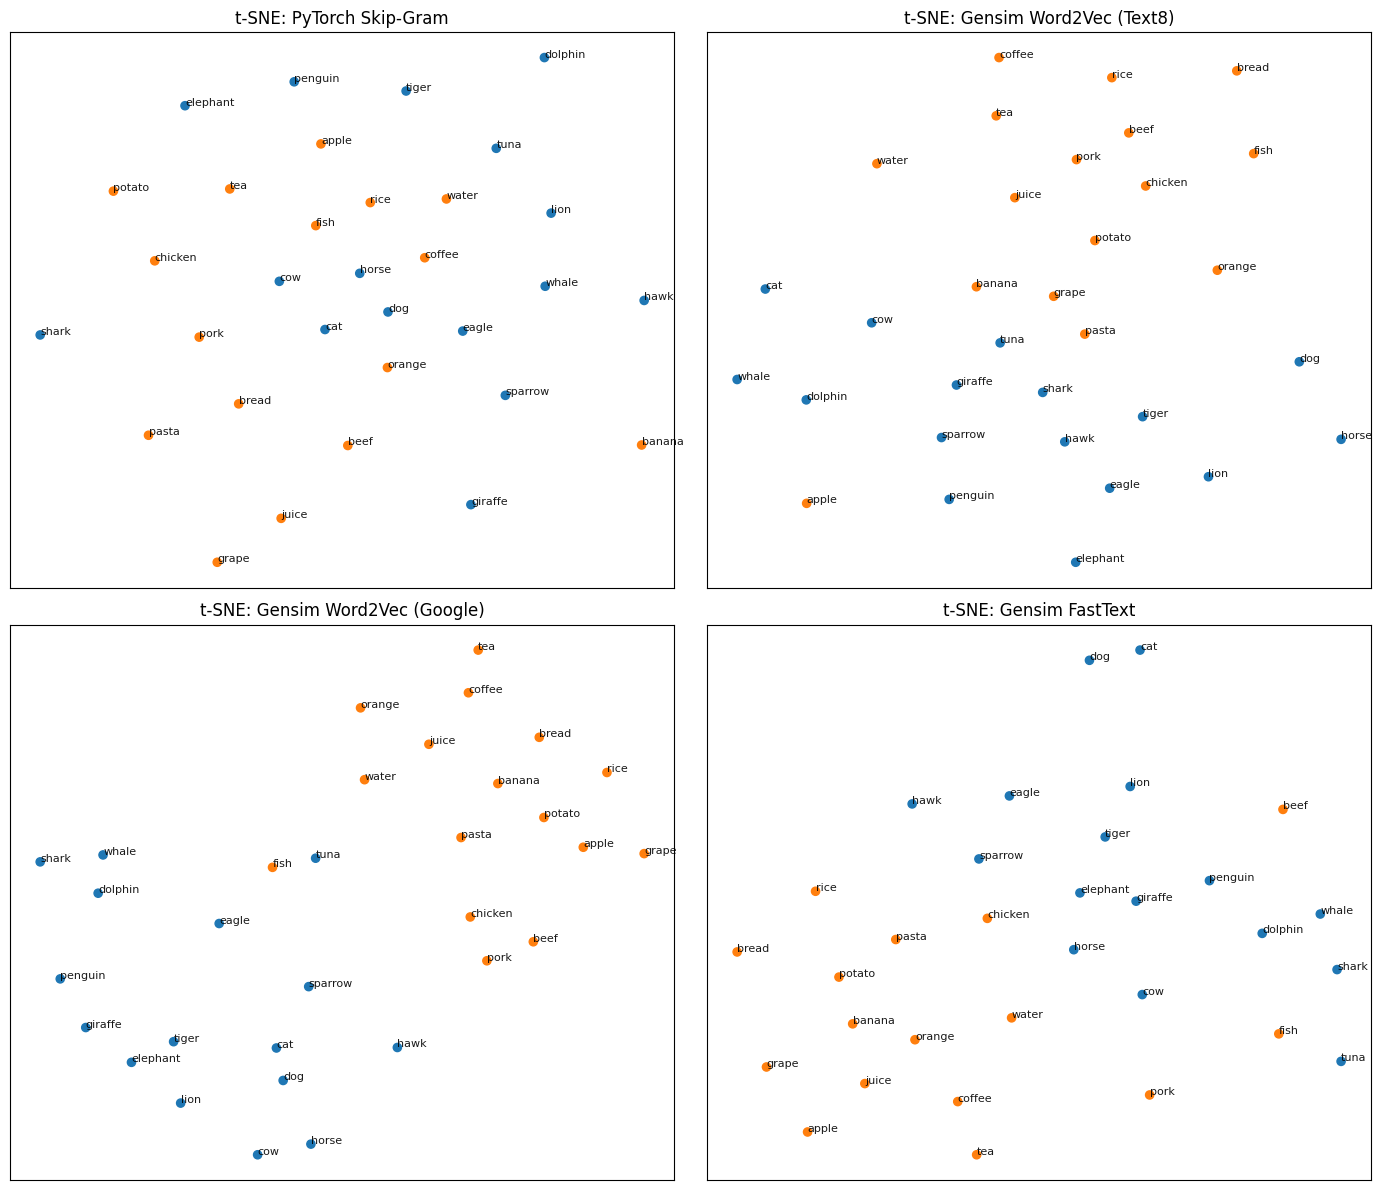

In [15]:
def get_vec_pytorch(word, E, word2idx):
    if word in word2idx:
        return E[word2idx[word]]
    return None

def get_vec_kv(word, kv):
    try:
        if word in kv:
            return kv[word]
    except Exception:
        pass
    try:
        return kv.get_vector(word)
    except Exception:
        return None

def build_matrix_for_source(source_name, E=None, word2idx=None, kv=None):
    X, y, kept_words = [], [], []
    missing = []

    for w in animals:
        v = get_vec_pytorch(w, E, word2idx) if source_name == "pytorch" else get_vec_kv(w, kv)
        if v is None:
            missing.append(w)
        else:
            X.append(v); y.append(0); kept_words.append(w)

    for w in foods:
        v = get_vec_pytorch(w, E, word2idx) if source_name == "pytorch" else get_vec_kv(w, kv)
        if v is None:
            missing.append(w)
        else:
            X.append(v); y.append(1); kept_words.append(w)

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=int)
    return X, y, kept_words, missing

def plot_2d(ax, Z, y, words, title):
    colors = np.where(y == 0, "tab:blue", "tab:orange")
    ax.scatter(Z[:, 0], Z[:, 1], c=colors, s=35)

    for i, w in enumerate(words):
        ax.text(Z[i, 0], Z[i, 1], w, fontsize=8, alpha=0.9)

    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])

X_pt, y_pt, w_pt, miss_pt = build_matrix_for_source("pytorch", E=E, word2idx=word2idx)
X_gs, y_gs, w_gs, miss_gs = build_matrix_for_source("gensim", kv=kv_gensim)
X_gn, y_gn, w_gn, miss_gn = build_matrix_for_source("googlenews", kv=kv_google)
X_ft, y_ft, w_ft, miss_ft = build_matrix_for_source("fasttext", kv=kv_fasttext)

print("Missing words (PyTorch):", miss_pt)
print("Missing words (Gensim):", miss_gs)
print("Missing words (GoogleNews):", miss_gn)
print("Missing words (FastText):", miss_ft)

def tsne_2d(X, random_state=42, perplexity=10):
    perp = min(perplexity, max(2, (len(X) - 1) // 3))
    return TSNE(
        n_components=2,
        perplexity=perp,
        init="pca",
        learning_rate="auto",
        random_state=random_state
    ).fit_transform(X)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

Z_pt = tsne_2d(X_pt)
plot_2d(axes[0,0], Z_pt, y_pt, w_pt, f"t-SNE: PyTorch Skip-Gram")

Z_gs = tsne_2d(X_gs)
plot_2d(axes[0,1], Z_gs, y_gs, w_gs, f"t-SNE: Gensim Word2Vec (Text8)")

Z_gn = tsne_2d(X_gn)
plot_2d(axes[1,0], Z_gn, y_gn, w_gn, f"t-SNE: Gensim Word2Vec (Google)")

Z_ft = tsne_2d(X_ft)
plot_2d(axes[1,1], Z_ft, y_ft, w_ft, f"t-SNE: Gensim FastText")

plt.tight_layout()
plt.show()

#### T-sne:
PyTorch Skip-Gram (100d): Animals and foods are mixed in the center. There is a really rough “two-cluster” structure, but overall category separation is weak.

Gensim Word2Vec (Text8, 100d): There are some partial grouping issue, but and there is noticeable overlap between animals and foods, seperation is better than PyTorch Skip-Gram.

Pretrained Word2Vec (GoogleNews, 300d): Category separation is much better than PyTorch Skip-Gram and Gensim Word2Vec, and animals tending to occupy a different region than foods.

Pretrained FastText (Wiki subwords, 300d): There is clear category separation pattern, but there is still some mixing for words.

Missing words (PyTorch): []
Missing words (Gensim): []
Missing words (GoogleNews): []
Missing words (FastText): []


d:\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by settin

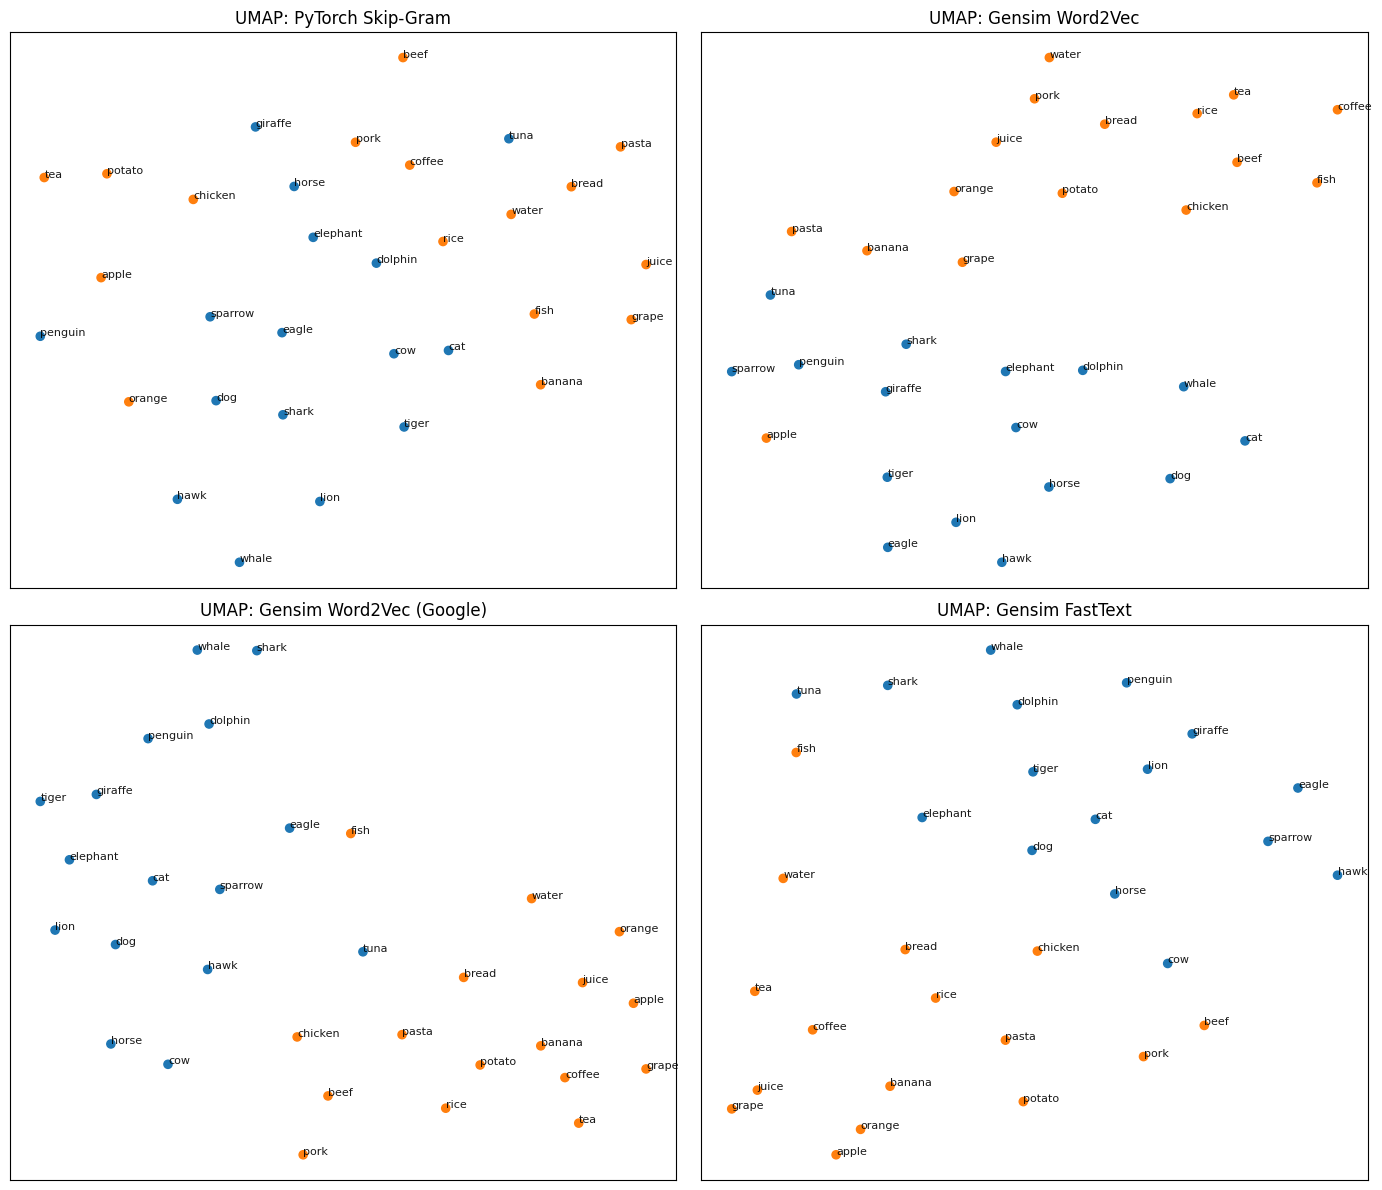

In [16]:
import umap.umap_ as umap

def get_vec_pytorch(word, E, word2idx):
    if word in word2idx:
        return E[word2idx[word]]
    return None

def get_vec_kv(word, kv):
    try:
        if word in kv:
            return kv[word]
    except Exception:
        pass
    try:
        return kv.get_vector(word)
    except Exception:
        return None

def build_matrix_for_source(source_name, E=None, word2idx=None, kv=None):
    X, y, kept_words = [], [], []
    missing = []

    for w in animals:
        v = get_vec_pytorch(w, E, word2idx) if source_name == "pytorch" else get_vec_kv(w, kv)
        if v is None:
            missing.append(w)
        else:
            X.append(v); y.append(0); kept_words.append(w)

    for w in foods:
        v = get_vec_pytorch(w, E, word2idx) if source_name == "pytorch" else get_vec_kv(w, kv)
        if v is None:
            missing.append(w)
        else:
            X.append(v); y.append(1); kept_words.append(w)

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=int)
    return X, y, kept_words, missing

def plot_2d(ax, Z, y, words, title):
    colors = np.where(y == 0, "tab:blue", "tab:orange")
    ax.scatter(Z[:, 0], Z[:, 1], c=colors, s=35)
    for i, w in enumerate(words):
        ax.text(Z[i, 0], Z[i, 1], w, fontsize=8, alpha=0.9)
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])


X_pt, y_pt, w_pt, miss_pt = build_matrix_for_source("pytorch", E=E, word2idx=word2idx)
X_gs, y_gs, w_gs, miss_gs = build_matrix_for_source("gensim", kv=kv_gensim)
X_gn, y_gn, w_gn, miss_gn = build_matrix_for_source("googlenews", kv=kv_google)
X_ft, y_ft, w_ft, miss_ft = build_matrix_for_source("fasttext", kv=kv_fasttext)

print("Missing words (PyTorch):", miss_pt)
print("Missing words (Gensim):", miss_gs)
print("Missing words (GoogleNews):", miss_gn)
print("Missing words (FastText):", miss_ft)

def umap_2d(X, random_state=42, n_neighbors=10, min_dist=0.2):
    reducer = umap.UMAP(
        n_components=2,
        random_state=random_state,
        n_neighbors=min(n_neighbors, max(2, len(X) - 1)),
        min_dist=min_dist
    )
    return reducer.fit_transform(X)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

Z_pt = umap_2d(X_pt)
plot_2d(axes[0,0], Z_pt, y_pt, w_pt, f"UMAP: PyTorch Skip-Gram")

Z_gs = umap_2d(X_gs)
plot_2d(axes[0,1], Z_gs, y_gs, w_gs, f"UMAP: Gensim Word2Vec")

Z_gn = umap_2d(X_gn)
plot_2d(axes[1,0], Z_gn, y_gn, w_gn, f"UMAP: Gensim Word2Vec (Google)")

Z_ft = umap_2d(X_ft)
plot_2d(axes[1,1], Z_ft, y_ft, w_ft, f"UMAP: Gensim FastText")

plt.tight_layout()
plt.show()


#### UMAP
PyTorch Skip-Gram (100d): iT looks mixed,animals and foods mixed spread from left to right which shows a weak separation.

Gensim Word2Vec (Text8, 100d): Slightly clearer than PyTorch, food is in the top, and the animal is in the bottom, and there are some points are mixed.

Pretrained Word2Vec (GoogleNews, 300d): It has a clear separation, animal cluster in the top right, and foods cluster in the bottom right. The gap between categories is more visible, words in the middle are polysemy which are both foods and animal.

Pretrained FastText (Wiki subwords, 300d): This shows good separation, but sometimes polysemy words can cross the category boundary like fish and chicken.

## Short Answer Questions

### Which embeddings performed best at capturing sentence meaning?

The pretrained fastText (Wiki subwords, 300d) performed best at capturing sentence meaning. In the cosine similarity results, pretrined fastTxt give the strongest match for "cat sleeping" query. It give the cat and feline sentence the highest similarity score than other models.

### Were the pretrained embeddings significantly better than your own? Why or why not?
Yes, the pretrained embeddings are significantly better than my own PyTorch-trained embeddings. I think the main reason will be pretrained embeddings are laerned from much larger corpora, and larger corpora means they have much larger statistics data to generalize better. In addition, fastText performs much better than other three model, this is because it uses subword, which helps to deal with morphology, and  deal with Out-of-Vocabulary issue.

### What factors might explain the differences in performance?
I think following factors might explain the differences: 
1. the traning data size: As googlenews and wiki have a huge dataset, and text8 has a relative smaller data set size.
2. embedding dimension, 300d(pretrained) often has more capacity than 100d models.
3. model design, FastText uses subwords to help with rare words and morphology, and out of vocabulary situation, and regular word2vec can not deal with those.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>


- **Tool(s) used:** GPT5.2; Gemini 3 pro
- **How you used them:** I used Gemini 3pro to explain the negative sampling concept, and concept of tsne. I used GPT5.2 to help me to drafting code for plots and word2vec train file, and cosine similarity. If there are any bugs, I used GPT 5.2 to debugg.
- **What you verified yourself:** I checked outputs for cosine similarity to ensure results looks correct, and ensure there are no bugs. I also checked the plots to see whether there are things does not make sense.
- **What you did *not* use AI for (if applicable):** (optional)